<a href="https://colab.research.google.com/github/BrunoDkno368/Proyecto-Machin-learning/blob/main/MLbasico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ETL

## EXTRAT (E)

In [54]:
df = pd.read_csv('/content/drive/MyDrive/Machin Learning/churn/Telco_churn.csv')

In [55]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [56]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [57]:
#TotalCharge figura como object pero es un numerico
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors= 'coerce')

In [58]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


In [59]:
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [60]:
print(df.duplicated().sum())

0


In [61]:
print(df.isna().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


## TRANSFORM (T)

In [62]:
# para poder trabajar con la columna churn pasamos de SI/NO a 1/0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0 })

In [63]:
# lo mismo con gender la columna Male/Famale por 1/0
df['gender']= df['gender'].map({'Male': 1, 'Famale':0})

##LOAD(l)

In [64]:
df.to_csv('df_churn.csv', index=False)

#EDA

##DISTRIBUCION

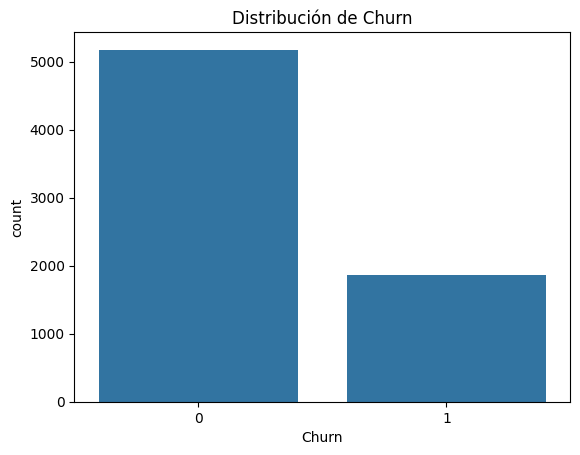

In [65]:
sns.countplot(x='Churn', data=df)
plt.title('Distribución de Churn')
plt.show()

##TIPO DE CONTRATO

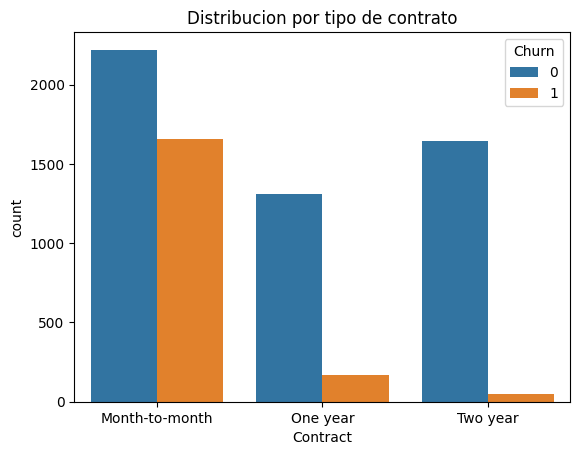

In [66]:
sns.countplot(x= 'Contract', hue= 'Churn', data=df)
plt.title('Distribucion por tipo de contrato')
plt.show()

## CORRELACIONES

In [67]:
df.dtypes

,0
customerID,object
gender,float64
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


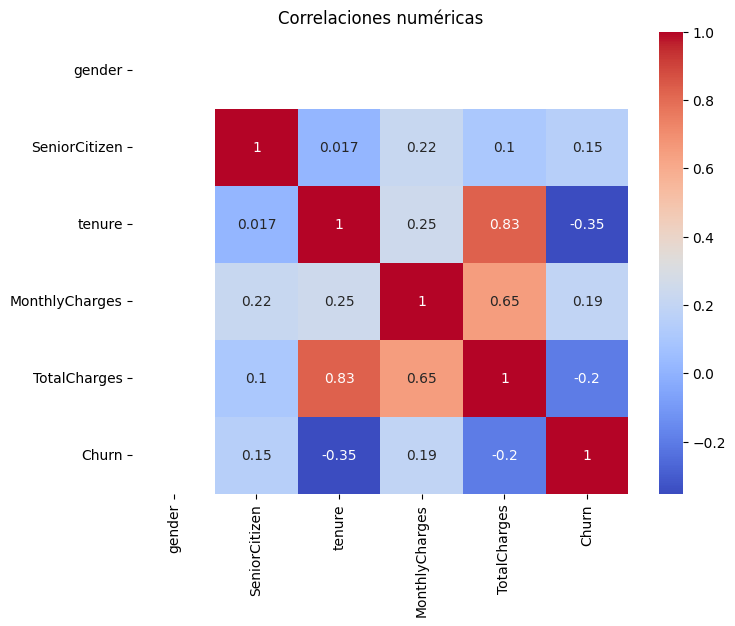

In [68]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include='number').corr(), cmap="coolwarm", annot=True)
plt.title("Correlaciones numéricas")
plt.show()

Insights esperados:

Clientes con contratos mensuales tienen mayor churn.

Cuotas mensuales más altas correlacionan con abandono.

Clientes nuevos (tenure bajo) tienden a irse más rápido.

# MACHINE LEARNING

##REGRESION LOGISTICA

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [70]:
X = df[['tenure','MonthlyCharges','TotalCharges']]
y = df['Churn']

In [73]:
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # mantener el mismo índice
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [74]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [77]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [78]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7982954545454546
[[944  91]
 [193 180]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1408
   macro avg       0.75      0.70      0.71      1408
weighted avg       0.79      0.80      0.79      1408

